# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

### Dataset Overview
This dataset contains synthetic transaction data used to identify fraudulent activities. It is characterized by a significant class imbalance, reflecting real-world fraud scenarios.

* **Total Records:** 10,000
* **Features:** 9 Predictors + 1 Target
* **Target Variable:** `is_fraud` (Binary)
* **Class Distribution:** ~4–5% Fraud (Highly Imbalanced)
* **Data Source:** [Kaggle - Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/miadul/credit-card-fraud-detection-dataset)


### Data Dictionary

| Feature Name | Type | Description |
| :--- | :--- | :--- |
| **transaction_id** | String | Unique identifier for each transaction |
| **amount** | Float | Transaction amount |
| **transaction_hour** | Integer | Hour of transaction (0–23) |
| **merchant_category** | Categorical | Type of merchant |
| **foreign_transaction** | Binary | 1 if international, 0 if domestic |
| **location_mismatch** | Binary | 1 if billing/transaction locations differ, 0 otherwise |
| **device_trust_score** | Integer | Trust score of the device (0–100) |
| **velocity_last_24h** | Integer | Number of transactions in the last 24 hours |
| **cardholder_age** | Integer | Age of the cardholder |
| **is_fraud** | Binary | **Target:** 1 (Fraud), 0 (Normal) |



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
# Load the datasets from Kaggle
df = kagglehub.dataset_load(
    adapter=KaggleDatasetAdapter.PANDAS,
    handle="miadul/credit-card-fraud-detection-dataset",
    path="credit_card_fraud_10k.csv",
)

Using Colab cache for faster access to the 'credit-card-fraud-detection-dataset' dataset.


In [5]:
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
# Dataset Shape and info
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (10000, 10)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [8]:
# Check for Missing Values
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nPercentage of Missing Values:")
print((missing_values / len(df) * 100).round(2))

transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64

Percentage of Missing Values:
transaction_id         0.0
amount                 0.0
transaction_hour       0.0
merchant_category      0.0
foreign_transaction    0.0
location_mismatch      0.0
device_trust_score     0.0
velocity_last_24h      0.0
cardholder_age         0.0
is_fraud               0.0
dtype: float64


In [9]:
# Statistical Summary
df.describe()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,175.949849,11.593300,0.097800,0.085700,61.798900,2.008900,43.468700,0.015100
std,2886.89568,175.392827,6.922708,0.297059,0.279935,21.487053,1.432559,14.979147,0.121957
min,1.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000
25%,2500.75000,50.905000,6.000000,0.000000,0.000000,43.000000,1.000000,30.000000,0.000000
50%,5000.50000,122.095000,12.000000,0.000000,0.000000,62.000000,2.000000,44.000000,0.000000
75%,7500.25000,242.480000,18.000000,0.000000,0.000000,80.000000,3.000000,56.000000,0.000000
max,10000.00000,1471.040000,23.000000,1.000000,1.000000,99.000000,9.000000,69.000000,1.000000


In [10]:
# Target Variable Distribution
fraud_counts = df['is_fraud'].value_counts()
fraud_percentage = df['is_fraud'].value_counts(normalize=True) * 100
print(f"\nFraud Distribution:")
print(fraud_counts)
print(f"\nFraud Percentage:")
print(fraud_percentage.round(2))


Fraud Distribution:
is_fraud
0    9849
1     151
Name: count, dtype: int64

Fraud Percentage:
is_fraud
0    98.49
1     1.51
Name: proportion, dtype: float64


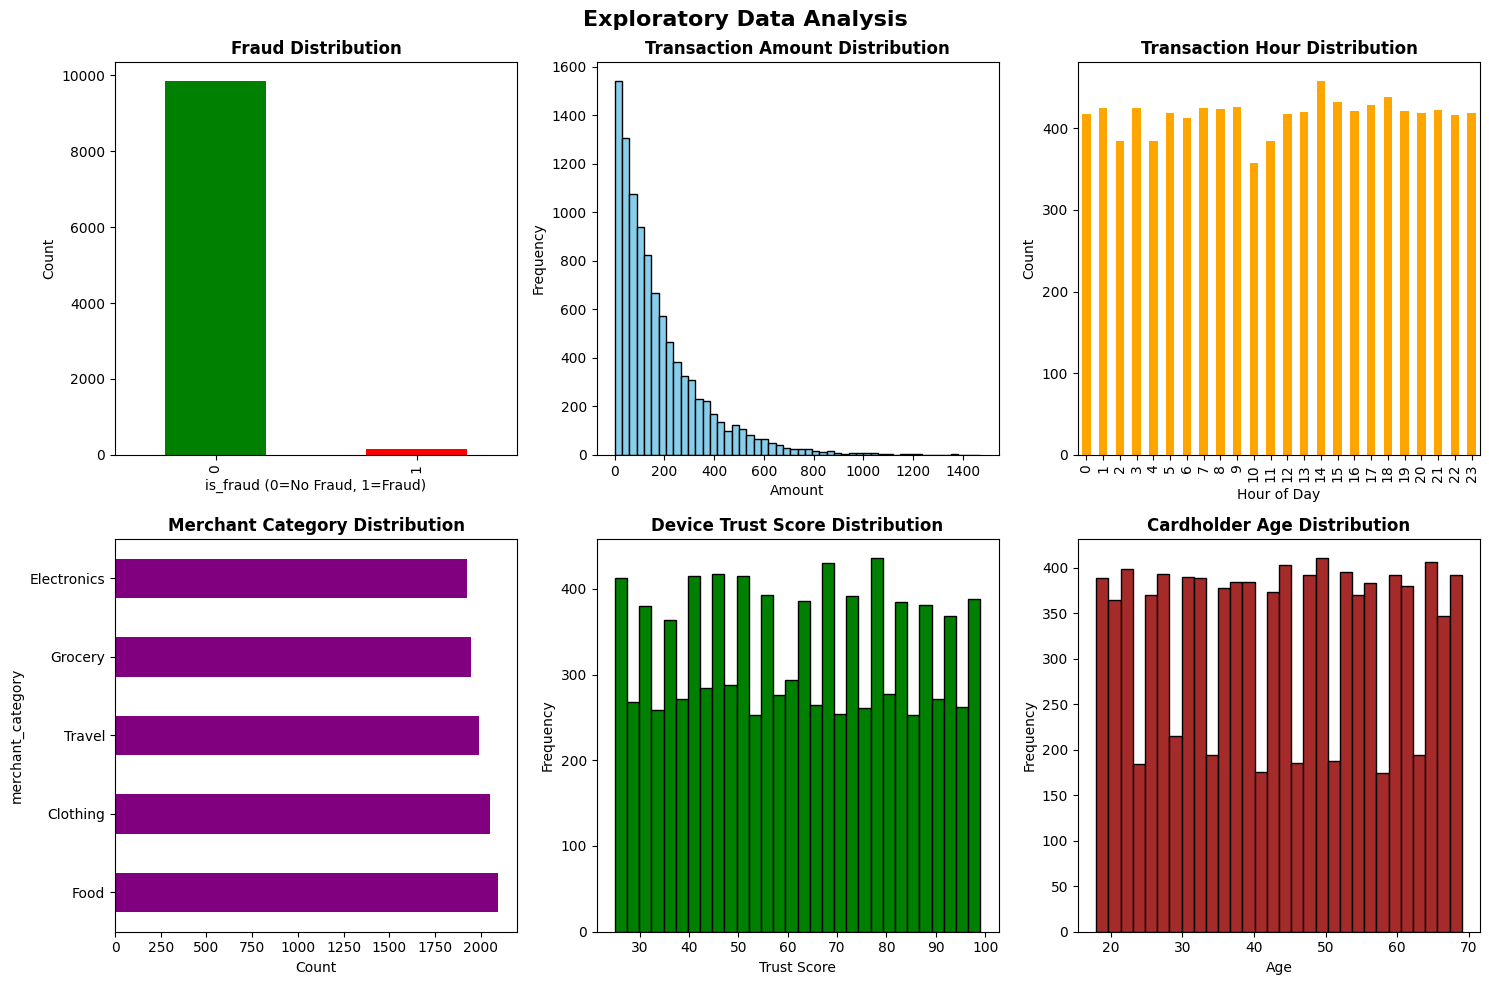

In [11]:
# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Target variable distribution
df['is_fraud'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['green', 'red'])
axes[0, 0].set_title('Fraud Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('is_fraud (0=No Fraud, 1=Fraud)')
axes[0, 0].set_ylabel('Count')

# Amount distribution
axes[0, 1].hist(df['amount'], bins=50, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Transaction Amount Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Amount')
axes[0, 1].set_ylabel('Frequency')

# Transaction hour distribution
df['transaction_hour'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 2], color='orange')
axes[0, 2].set_title('Transaction Hour Distribution', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Hour of Day')
axes[0, 2].set_ylabel('Count')

# Merchant category distribution
df['merchant_category'].value_counts().plot(kind='barh', ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Merchant Category Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Count')

# Device trust score distribution
axes[1, 1].hist(df['device_trust_score'], bins=30, color='green', edgecolor='black')
axes[1, 1].set_title('Device Trust Score Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Trust Score')
axes[1, 1].set_ylabel('Frequency')

# Cardholder age distribution
axes[1, 2].hist(df['cardholder_age'], bins=30, color='brown', edgecolor='black')
axes[1, 2].set_title('Cardholder Age Distribution', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Age')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

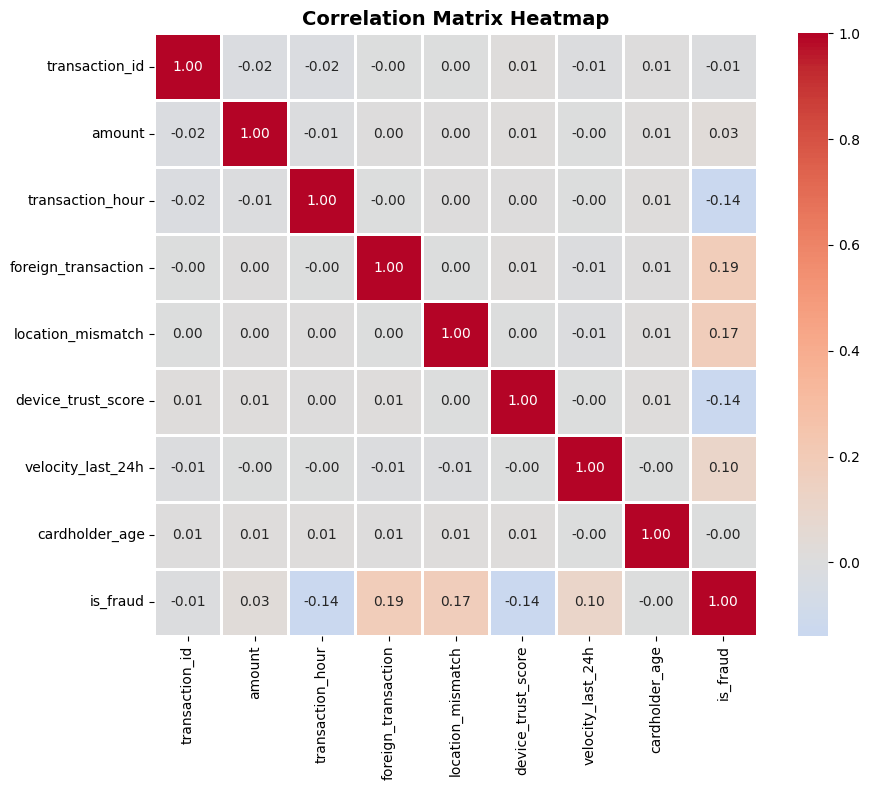

In [12]:
# Correlation Analysis
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            square=True, linewidths=1)
plt.title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [13]:
# Categorical Features Analysis
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col} - Value Counts:")
    print(df[col].value_counts())


merchant_category - Value Counts:
merchant_category
Food           2093
Clothing       2050
Travel         1990
Grocery        1944
Electronics    1923
Name: count, dtype: int64


In [14]:
# Fraud Distribution by Categorical Features
for col in categorical_cols:
    fraud_by_category = df.groupby(col)['is_fraud'].agg(['sum', 'count', 'mean'])
    fraud_by_category.columns = ['Fraud Count', 'Total Count', 'Fraud Rate']
    fraud_by_category['Fraud Rate %'] = fraud_by_category['Fraud Rate'] * 100
    print(f"\n{col}:")
    print(fraud_by_category.round(4))


merchant_category:
                   Fraud Count  Total Count  Fraud Rate  Fraud Rate %
merchant_category                                                    
Clothing                    24         2050      0.0117        1.1707
Electronics                 24         1923      0.0125        1.2480
Food                        35         2093      0.0167        1.6722
Grocery                     39         1944      0.0201        2.0062
Travel                      29         1990      0.0146        1.4573


In [15]:
# Duplicates Check
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
if duplicate_rows > 0:
    print(f"Percentage of duplicates: {(duplicate_rows/len(df)*100):.2f}%")

Number of duplicate rows: 0


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [16]:
# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

In [17]:
# Feature Binning (for continuous features)
# IMPORTANT: Binning should be done on ORIGINAL values, not scaled values

# Bin the amount into categories (Low, Medium, High)
df_processed['amount_bin'] = pd.cut(df_processed['amount'], 
                                 bins=3, 
                                 labels=['Low', 'Medium', 'High'],
                                 include_lowest=True)

# Bin age into age groups
df_processed['age_group'] = pd.cut(df_processed['cardholder_age'], 
                                bins=[0, 25, 35, 50, 65, 100],
                                labels=['Youth', 'Young Adult', 'Middle Age', 'Senior', 'Elderly'],
                                include_lowest=True)

# Bin transaction hour into time periods
df_processed['time_period'] = pd.cut(df_processed['transaction_hour'],
                                  bins=[0, 6, 12, 18, 24],
                                  labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                                  include_lowest=True,
                                  right=False)

print("Amount bins created:")
print(df_processed['amount_bin'].value_counts().sort_index())
print("\nAge groups created:")
print(df_processed['age_group'].value_counts().sort_index())
print("\nTime periods created:")
print(df_processed['time_period'].value_counts().sort_index())

# Encode binned features and add to df_processed
for col in ['amount_bin', 'age_group', 'time_period']:
    le_bin = LabelEncoder()
    df_processed[col + '_encoded'] = le_bin.fit_transform(df_processed[col].astype(str))
    # Drop the original categorical binned column
    df_processed = df_processed.drop(col, axis=1)

Amount bins created:
amount_bin
Low       9353
Medium     609
High        38
Name: count, dtype: int64

Age groups created:
age_group
Youth          1536
Young Adult    1937
Middle Age     2904
Senior         2884
Elderly         739
Name: count, dtype: int64

Time periods created:
time_period
Night        2455
Morning      2431
Afternoon    2577
Evening      2537
Name: count, dtype: int64


In [18]:
# Encoding Categorical Features
categorical_columns = ['merchant_category', 'foreign_transaction', 'location_mismatch']

# For binary features, use binary encoding
binary_cols = ['foreign_transaction', 'location_mismatch']
print("\nBinary Features (already numeric):")
for col in binary_cols:
    if col in df_processed.columns:
        print(f"  {col}: {df_processed[col].unique()}")

# For categorical features, use Label Encoding
print("\nCategorical Features (to be encoded):")
le_dict = {}
for col in ['merchant_category']:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
        le_dict[col] = le
        print(f"  {col}:")
        for i, label in enumerate(le.classes_):
            print(f"    {label}: {i}")

# Drop original categorical column after encoding
df_processed = df_processed.drop('merchant_category', axis=1)
print("\nOriginal categorical column dropped. Using encoded version instead.")


Binary Features (already numeric):
  foreign_transaction: [0 1]
  location_mismatch: [0 1]

Categorical Features (to be encoded):
  merchant_category:
    Clothing: 0
    Electronics: 1
    Food: 2
    Grocery: 3
    Travel: 4

Original categorical column dropped. Using encoded version instead.


In [19]:
# Feature Normalization/Standardization

# Separate features and target
X = df_processed.drop('is_fraud', axis=1)
y = df_processed['is_fraud']

# Identify numeric columns for scaling (excluding transaction_id and encoded binned features)
columns_to_scale = ['amount', 'transaction_hour', 'device_trust_score', 
                    'velocity_last_24h', 'cardholder_age', 'merchant_category_encoded']

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

print(f"Scaled columns: {columns_to_scale}")
print("\nScaling Statistics (before and after):")
print(f"\nOriginal - Amount (min: {X['amount'].min():.2f}, max: {X['amount'].max():.2f}, mean: {X['amount'].mean():.2f})")
print(f"Scaled   - Amount (min: {X_scaled['amount'].min():.2f}, max: {X_scaled['amount'].max():.2f}, mean: {X_scaled['amount'].mean():.2f})")

print(f"\nFinal features in X_scaled:")
print(X_scaled.columns.tolist())

Scaled columns: ['amount', 'transaction_hour', 'device_trust_score', 'velocity_last_24h', 'cardholder_age', 'merchant_category_encoded']

Scaling Statistics (before and after):

Original - Amount (min: 0.00, max: 1471.04, mean: 175.95)
Scaled   - Amount (min: -1.00, max: 7.38, mean: 0.00)

Final features in X_scaled:
['transaction_id', 'amount', 'transaction_hour', 'foreign_transaction', 'location_mismatch', 'device_trust_score', 'velocity_last_24h', 'cardholder_age', 'amount_bin_encoded', 'age_group_encoded', 'time_period_encoded', 'merchant_category_encoded']


In [20]:
#  Data Summary
print(f"\nOriginal dataset shape: {df.shape}")
print(f"Processed dataset shape: {(len(X_scaled), len(X_scaled.columns) + 1)}")


Original dataset shape: (10000, 10)
Processed dataset shape: (10000, 13)


In [21]:
# Final Feature Set
X_scaled.head()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,amount_bin_encoded,age_group_encoded,time_period_encoded,merchant_category_encoded
0,1,-0.521597,1.503345,0,0,0.195528,0.691873,-0.231580,1,1,1,-0.699651
1,2,2.086108,-1.241383,1,0,1.172909,-0.704299,1.370727,2,2,3,1.420290
2,3,0.348151,0.781048,0,0,-0.595686,-0.704299,1.170439,1,2,0,0.713643
3,4,-0.066254,-1.096923,0,1,0.474779,0.691873,-0.632157,1,3,3,0.713643
4,5,-0.829151,0.492130,0,0,0.800573,-1.402386,0.035471,1,1,0,0.006996


In [22]:
print(f"\nTarget variable distribution:")
print(y.value_counts())


Target variable distribution:
is_fraud
0    9849
1     151
Name: count, dtype: int64


In [23]:
print(f"\nData types after preprocessing:")
print(X_scaled.dtypes)


Data types after preprocessing:
transaction_id                 int64
amount                       float64
transaction_hour             float64
foreign_transaction            int64
location_mismatch              int64
device_trust_score           float64
velocity_last_24h            float64
cardholder_age               float64
amount_bin_encoded             int64
age_group_encoded              int64
time_period_encoded            int64
merchant_category_encoded    float64
dtype: object


In [24]:
# Combine processed features with target for further analysis
# df_final = X_scaled.copy()
# df_final['is_fraud'] = y.reset_index(drop=True)

# print(f"\n✓ Data preprocessing completed successfully!")
# print(f"✓ Dataset ready for model building and training")
# print(f"✓ Final dataset shape: {df_final.shape}")